<a href="https://colab.research.google.com/github/ZEBAAFROZ/CLIP_Exploration/blob/main/CLIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.6 MB/s eta 0:00:00


In [1]:
from skimage.segmentation import slic
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import skimage.io
import skimage.transform
import warnings

In [24]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")



`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


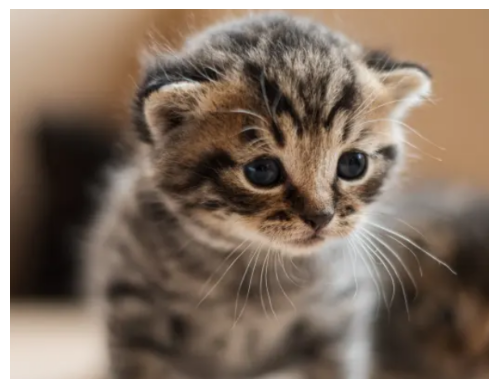

In [25]:
from PIL import Image
import matplotlib.pyplot as plt

# Specify the path to the uploaded image
image_path = '/content/cat.png'  # Replace with the actual file name

# Open the image using PIL
image = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()


In [26]:
inputs = processor(text=["a photo of a cat", "a photo of a dog"], images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

In [27]:
probs[0][0]

tensor(0.9993, grad_fn=<SelectBackward0>)

In [28]:
probs[0][1]

tensor(0.0007, grad_fn=<SelectBackward0>)

In [29]:
result =  " Score for a photo of a cat :- {:.3f} and Score for a photo of a dog {:.3f}.".format(probs[0][0], probs[0][1])
print(result)

 Score for a photo of a cat :- 0.999 and Score for a photo of a dog 0.001.
